<a href="https://colab.research.google.com/github/MassGH2023/Regression-Models/blob/main/Regression_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
%matplotlib inline


In [3]:
up = files.upload()

Saving Life_Expectancy_Data.csv to Life_Expectancy_Data (1).csv


In [4]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [6]:
df.isna().sum();

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.select_dtypes("O").columns

Index(['Status'], dtype='object')

In [9]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [10]:
df.shape

(2938, 21)

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.select_dtypes(include = ["int64", "float64"]).columns

Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
for c in df.select_dtypes(include = ["int64", "float64"]).columns:
  print(f"for column {c} the mean is:\t {df[c].mean()}")

for column Year the mean is:	 2007.5187202178352
for column Life expectancy the mean is:	 69.22493169398908
for column Adult Mortality the mean is:	 164.79644808743168
for column infant deaths the mean is:	 30.303948264125257
for column Alcohol the mean is:	 4.602860787172012
for column percentage expenditure the mean is:	 738.2512954533831
for column Hepatitis B the mean is:	 80.94046121593291
for column Measles the mean is:	 2419.5922396187884
for column BMI the mean is:	 38.321246556473824
for column under-five deaths the mean is:	 42.0357385976855
for column Polio the mean is:	 82.55018842069202
for column Total expenditure the mean is:	 5.9381895280235995
for column Diphtheria the mean is:	 82.32408359027065
for column HIV/AIDS the mean is:	 1.7421034717494894
for column GDP the mean is:	 7483.158469138474
for column Population the mean is:	 12753375.120052494
for column thinness  1-19 years the mean is:	 4.839703856749312
for column thinness 5-9 years the mean is:	 4.870316804407

<Axes: >

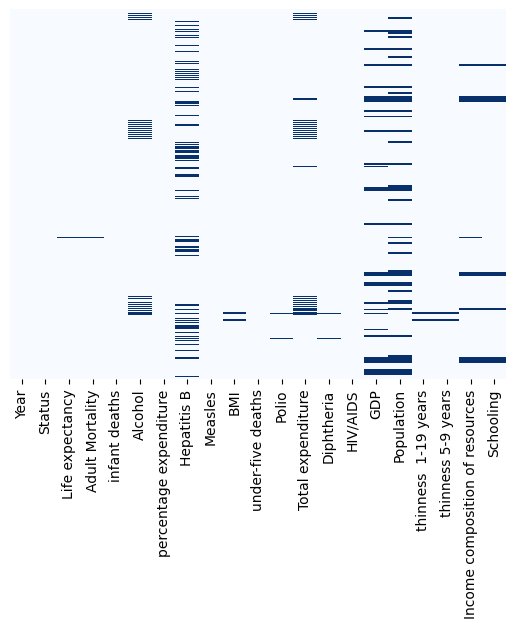

In [14]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

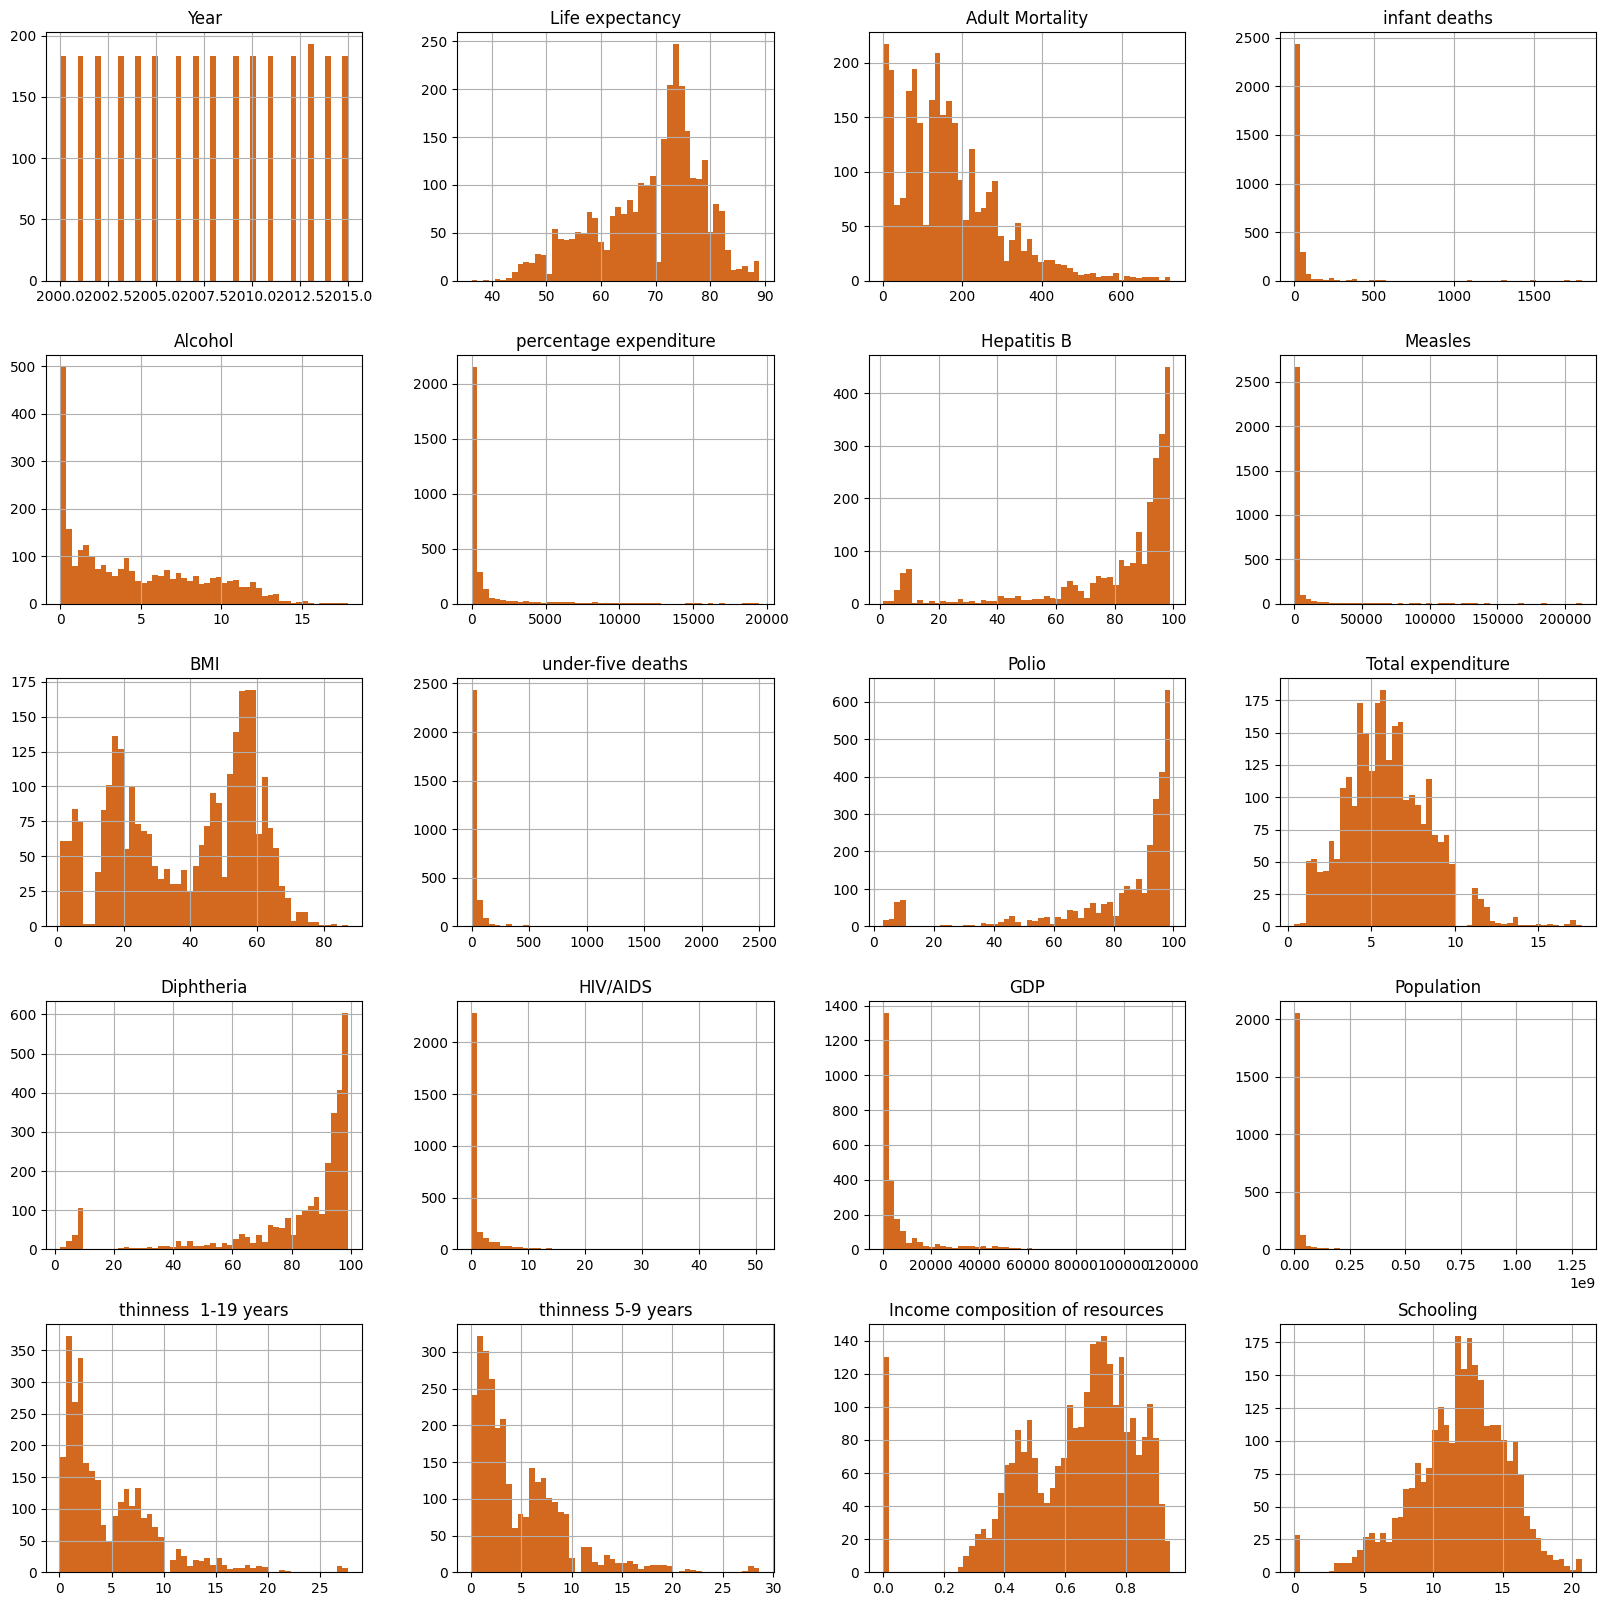

In [15]:
df.hist(bins = 50, figsize = (20,20), color = 'chocolate');

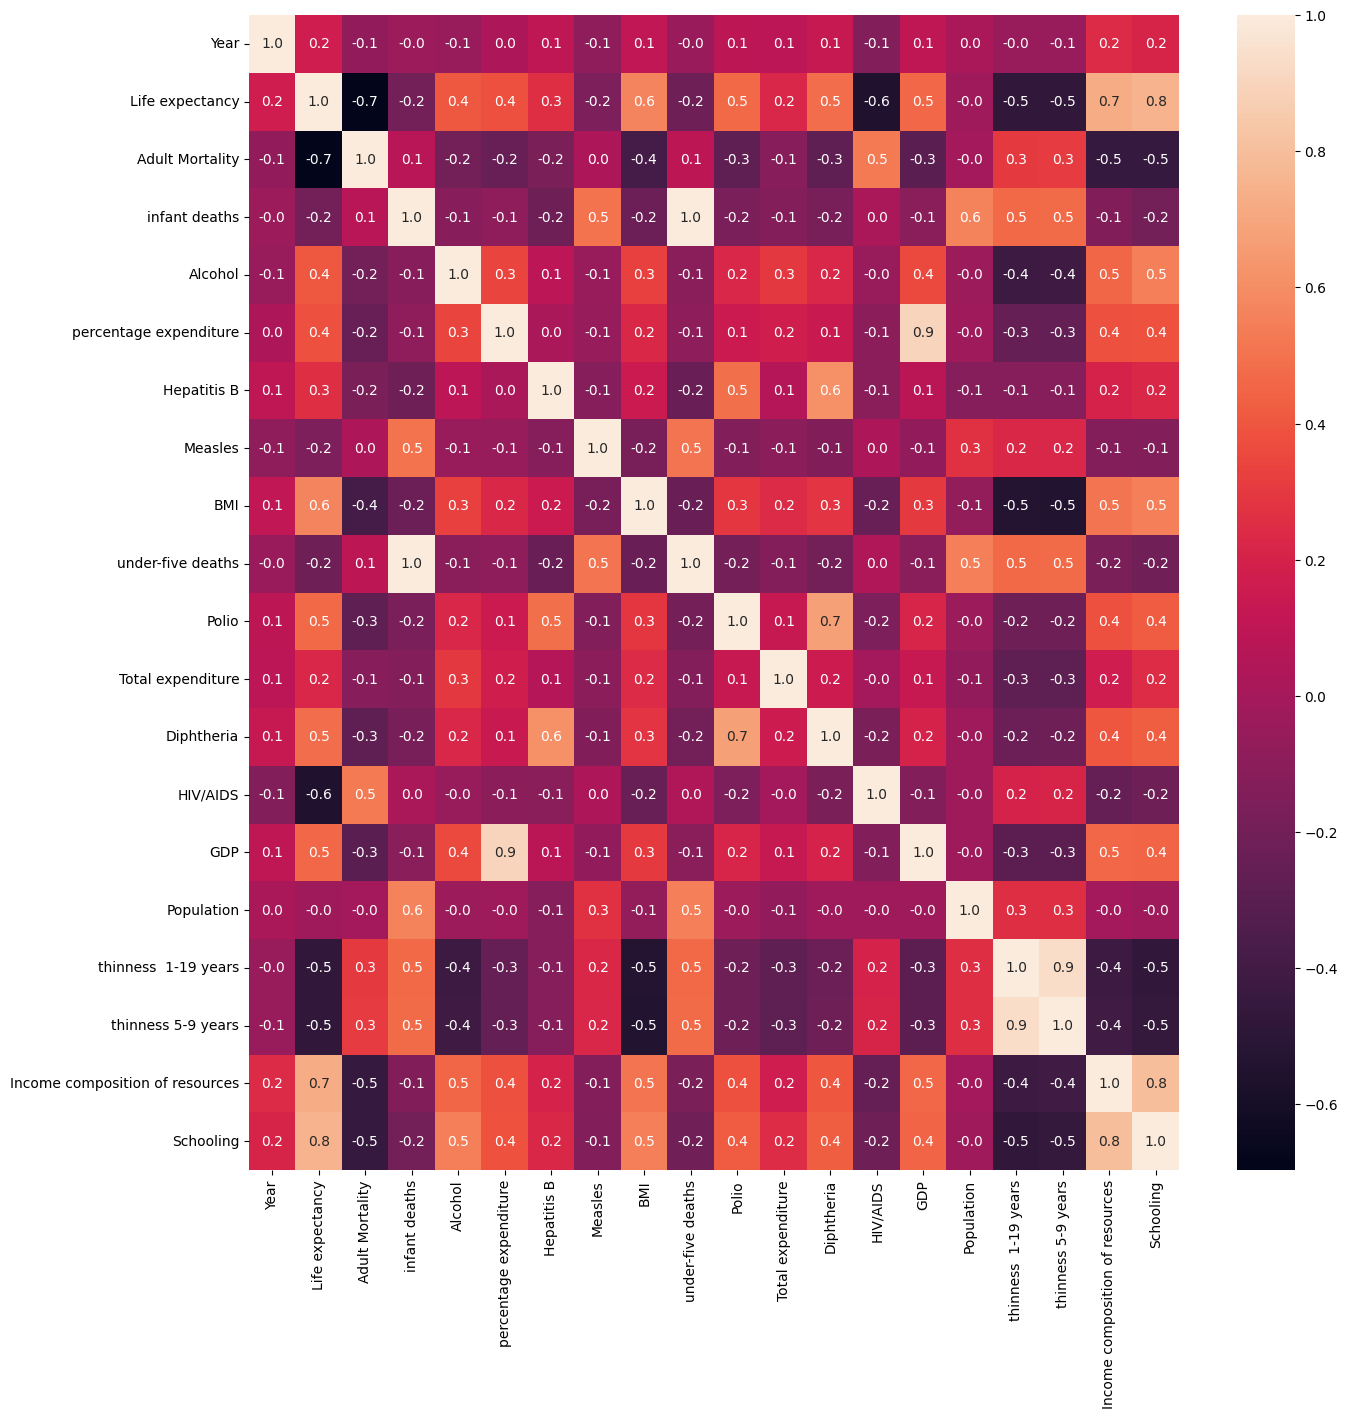

In [16]:
plt.figure( figsize = (15,15),)
corrmat = df_numeric = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corrmat, annot = True, fmt=".1f");

In [17]:
enc = OneHotEncoder()

enc.fit_transform(df[df.select_dtypes(include= "O").columns]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [18]:
 one_hot_df = pd.DataFrame(enc.fit_transform(df[df.select_dtypes(include= "O").columns]).toarray(),
                          columns=enc.get_feature_names_out(df.select_dtypes(include= "O").columns))

In [19]:
 df_enc = pd.concat([df.drop(df.select_dtypes(include= "O").columns, axis=1), one_hot_df], axis=1)
 df_enc.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [20]:
# [df_enc[c].isnull().sum() for c in df_enc.columns if df_enc[c].isnull().sum() != 0]
df_enc.isnull().sum()[df_enc.isnull().sum() != 0]

,0
Life expectancy,10
Adult Mortality,10
Alcohol,194
Hepatitis B,553
BMI,34
Polio,19
Total expenditure,226
Diphtheria,19
GDP,448
Population,652


In [21]:
df_enc = df_enc.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [22]:
df_enc.isnull().sum()[df_enc.isnull().sum() != 0]

,0


In [23]:
df_enc.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [24]:
X = df_enc.drop(columns = ['Life expectancy'])
y = df[['Life expectancy']]
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
X_train.shape, X_test.shape

((2056, 21), (882, 21))

In [27]:
xgbm = xgb.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100, tree_method = 'auto')

In [34]:
y_train =y_train.fillna(y_train.mean())
y_test =y_test.fillna(y_test.mean())

In [29]:
!pip install --upgrade xgboost


In [30]:
!pip install scikit-learn==1.2.2


In [31]:
xgbm.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
round(xgbm.score(X_test, y_test), 2)

0.96

In [37]:
yhat = xgbm.predict(X_test)

R2= 1- SSres / SStot

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
round(r2_score(yhat, y_test),2)

0.96

In [51]:
y_hat = pd.DataFrame(yhat, columns=['y_hat'])

In [57]:
mse = mean_squared_error(yhat, y_test)
mae = mean_absolute_error(yhat, y_test)
r2 = r2_score(yhat, y_test)

print(f"mse: {round(mse, 2)} \nmae: {round(mae, 2)} \nr2:  {round(r2, 2)}")

mse: 3.78 
mae: 1.23 
r2:  0.96


In [67]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()
lrm.fit(X_train, y_train)
y_hatlr = lrm.predict(X_test)

mselr = mean_squared_error(y_hatlr, y_test)
maelr = mean_absolute_error(y_hatlr, y_test)
r2lr = r2_score(y_hatlr, y_test)

print(f"mse: {round(mselr, 2)} \nmae: {round(maelr, 2)} \nr2:  {round(r2lr, 2)}")

mse: 16.75 
mae: 3.06 
r2:  0.78


In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

pf = PolynomialFeatures(degree= 2)
ss = StandardScaler()

In [82]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)


In [83]:
lrm.fit(X_train_s, y_train)
y_hatlrs = lrm.predict(X_test)

mselrs = mean_squared_error(y_hatlrs, y_test)
maelrs = mean_absolute_error(y_hatlrs, y_test)
r2lrs = r2_score(y_hatlrs, y_test)

print(f"mse: {round(mselrs, 2)} \nmae: {round(maelrs, 2)} \nr2:  {round(r2lrs, 2)}")

mse: 39375969229.98 
mae: 49011.07 
r2:  -0.06


In [80]:
type(X_train_s)

numpy.ndarray

In [91]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.001, max_iter= 100000)


lasso.fit(X_train, y_train)
lasso.predict(X_test);


mselrlass = mean_squared_error(lasso.predict(X_test), y_test)
maelrlass = mean_absolute_error(lasso.predict(X_test), y_test)
r2lrlass = r2_score(lasso.predict(X_test), y_test)

print(f"mse: {round(mselrlass, 2)} \nmae: {round(maelrlass, 2)} \nr2:  {round(r2lrlass, 2)}")

mse: 16.74 
mae: 3.06 
r2:  0.78


In [96]:
X_train_p = pf.fit_transform(X_train)
X_test_p = pf.transform(X_test)

In [99]:
lrm.fit(X_train_p, y_train)
lrm.predict(X_test_p);

mselrpf = mean_squared_error(lrm.predict(X_test_p), y_test)
maelrpf = mean_absolute_error(lrm.predict(X_test_p), y_test)
r2lrpf = r2_score(lrm.predict(X_test_p), y_test)

print(f"mse: {round(mselrpf, 2)} \nmae: {round(maelrpf, 2)} \nr2:  {round(r2lrpf, 2)}")

mse: 12.45 
mae: 2.34 
r2:  0.86


In [ ]:
lasso = linear_model.Lasso(alpha=0.001, max_iter= 1000000)
lasso.fit(X_train_p, y_train)
mselrlpf = mean_squared_error(lasso.predict(X_test_p), y_test)
maelrlpf = mean_absolute_error(lasso.predict(X_test_p), y_test)
r2lrlpf = r2_score(lasso.predict(X_test_p), y_test)

print(f"mse: {round(mselrlpf, 2)} \nmae: {round(maelrlpf, 2)} \nr2:  {round(r2lrlpf, 2)}")